In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


%matplotlib inline

In [3]:
df = pd.read_csv("../data/data_3.csv")
target = "manufacture"


In [12]:
columns = ["mixins","butter type","sugar index","bake time","quality"]

In [13]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,crunch factor,aesthetic appeal,sugar index full,bake time full,raisins,nuts,chocolate,peanut,oats,manufacture
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,1.30,3,9.5,12.1,1,0,0,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,1.71,3,3.3,8.4,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,1.78,3,1.9,14.0,0,1,1,0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,1.59,3,10.5,10.5,0,0,1,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,1.30,3,2.4,9.4,0,1,1,0,1,0


In [14]:
df.drop(columns=columns, inplace=True)

In [95]:
X = df.drop(target, axis=1)
y = df[target]

In [28]:
#Split DF into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

## Random Forest Classifier

In [36]:
clf=RandomForestClassifier(n_estimators=50)


In [37]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred=clf.predict(X_test)
y_pred2=clf.predict(X_train)

In [39]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8196089231616634


In [40]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred2))

Accuracy: 0.9993573264781491


## Random Forest

In [44]:
#Grid search for parameter selection for a Random Forest Classifier model
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [10, 5]
}

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [46]:
#Model creation:
RFC = RandomForestClassifier(n_jobs=-1)
GS = GridSearchCV(RFC, param_grid, cv=5, verbose = 3)

In [47]:
#LAUNCH MODEL:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.8301282051282052, total=   8.4s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.8108974358974359, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.8295819935691319, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.8231511254019293, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.8193548387096774, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, score=0.8461538461538461, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, score=0.8141025641025641, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, score=0.8102893890675241, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ........

[CV]  max_depth=5, max_features=log2, n_estimators=100, score=0.7781350482315113, total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=100 ................
[CV]  max_depth=5, max_features=log2, n_estimators=100, score=0.8263665594855305, total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=100 ................
[CV]  max_depth=5, max_features=log2, n_estimators=100, score=0.7935483870967742, total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................
[CV]  max_depth=5, max_features=log2, n_estimators=200, score=0.8108974358974359, total=   0.3s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................
[CV]  max_depth=5, max_features=log2, n_estimators=200, score=0.7852564102564102, total=   0.4s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................
[CV]  max_depth=5, max_features=log2, n_estimators=200, score=0.7877813504823151, total=   0.3s
[CV] max_depth=5, max_features=log2, n_estimators=200 ...............

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   39.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [48]:
GS.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}

In [53]:
#With the best parameters, we create the final model with the train dataset:
RFR = RandomForestRegressor(max_depth = 10, max_features='auto', n_estimators=100)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
#Prediction of the test dataset:
y_train_pred = RFR.predict(X_train)
y_pred = RFR.predict(X_test)

In [60]:
#We check scores with train:
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
print ('TRAIN MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

TRAIN MODEL METRICS:
The R2 score is: 0.8367198512931837
The MAE score is: 0.14153137023672266


In [61]:
#We check scores with test:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print ('TEST MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))


TEST MODEL METRICS:
The R2 score is: 0.48961154155486775
The MAE score is: 0.25919543760942


## Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
#Split DF into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [86]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
print(model.intercept_)
print(model.coef_)

132.6027493919705
[ 8.04511408e-02 -3.27221271e-05  7.44290124e-04  6.52248734e-04
 -1.37542882e+02  4.44593931e-01  1.79081836e-01  4.24666471e-02
 -1.25973562e-03  2.46471781e-02  5.90171464e-02 -1.82868887e-02
 -6.79947304e-03 -1.70046966e-01  1.06534477e-01 -1.78223616e-01
  9.46534908e-02]


In [88]:
pred = model.predict(X_test)

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.4169775208521552

In [90]:
df["pred"] = pd.Series(pred)

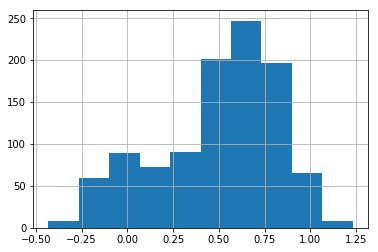

In [91]:
df["pred"].hist()

In [92]:
df.head()

,sugar to flour ratio,bake temp,chill time,calories,density,pH,grams baking soda,weight,crunch factor,aesthetic appeal,sugar index full,bake time full,raisins,nuts,chocolate,peanut,oats,manufacture,pred
0,0.25,300,15.0,136.0,0.99367,8.10,0.44,15.2,1.30,3,9.5,12.1,1,0,0,0,0,1,0.503007
1,0.23,520,34.0,113.0,0.99429,8.16,0.48,12.4,1.71,3,3.3,8.4,1,0,0,0,0,0,0.176831
2,0.18,360,33.0,106.0,0.98746,8.21,0.83,9.4,1.78,3,1.9,14.0,0,1,1,0,0,1,0.662834
3,0.18,490,41.0,124.0,0.99630,8.14,0.35,12.2,1.59,3,10.5,10.5,0,0,1,0,0,0,0.573713
4,0.24,770,6.0,33.0,0.99740,8.09,0.57,19.8,1.30,3,2.4,9.4,0,1,1,0,1,0,0.650626


In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
print(classification_report(y_test, pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.linear_model import LogisticRegression


In [94]:
logisticRegr = LogisticRegression()


NameError: name 'LogisticRegression' is not defined

In [ ]:
logisticRegr.fit(X_train, y_train)


In [ ]:
pred = logisticRegr.predict(X_test)

In [ ]:
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print ('TEST MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

In [ ]:
>>> X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
>>> clf.fit(X, y)  


In [65]:
import lightgbm as lgb

In [66]:
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [67]:
y_pred=clf.predict(X_test)


In [68]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print ('TEST MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

TEST MODEL METRICS:
The R2 score is: 0.17151800578446785
The MAE score is: 0.4515039964208354


In [69]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(24,40,2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

C:\Users\denes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.840893	valid_0's binary_logloss: 0.652225	valid_0's l1: 0.478008
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.852402	valid_0's binary_logloss: 0.620032	valid_0's l1: 0.459179
[3]	valid_0's auc: 0.854112	valid_0's binary_logloss: 0.59366	valid_0's l1: 0.442163
[4]	valid_0's auc: 0.863873	valid_0's binary_logloss: 0.568729	valid_0's l1: 0.425635
[5]	valid_0's auc: 0.865624	valid_0's binary_logloss: 0.548905	valid_0's l1: 0.411123
[6]	valid_0's auc: 0.868907	valid_0's binary_logloss: 0.531282	valid_0's l1: 0.397773
[7]	valid_0's auc: 0.870912	valid_0's binary_logloss: 0.515969	valid_0's l1: 0.385335
[8]	valid_0's auc: 0.873901	valid_0's binary_logloss: 0.502587	valid_0's l1: 0.374291
[9]	valid_0's auc: 0.875184	valid_0's binary_logloss: 0.490819	valid_0's l1: 0.363609
[10]	valid_0's auc: 0.87597	valid_0's binary_logloss: 0.481254	valid_0's l1: 0.354249
[11]	valid_0's auc: 0.87712	valid_0's binary_logloss: 0.47209	valid_0's l1: 0.345

[23]	valid_0's auc: 0.883482	valid_0's binary_logloss: 0.426903	valid_0's l1: 0.282505
[24]	valid_0's auc: 0.883604	valid_0's binary_logloss: 0.425953	valid_0's l1: 0.279706
[25]	valid_0's auc: 0.883595	valid_0's binary_logloss: 0.425228	valid_0's l1: 0.277125
[26]	valid_0's auc: 0.884556	valid_0's binary_logloss: 0.423421	valid_0's l1: 0.274046
Did not meet early stopping. Best iteration is:
[26]	valid_0's auc: 0.884556	valid_0's binary_logloss: 0.423421	valid_0's l1: 0.274046
[1]	valid_0's auc: 0.844981	valid_0's binary_logloss: 0.651923	valid_0's l1: 0.477893
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.861766	valid_0's binary_logloss: 0.617467	valid_0's l1: 0.457844
[3]	valid_0's auc: 0.872397	valid_0's binary_logloss: 0.58779	valid_0's l1: 0.439395
[4]	valid_0's auc: 0.873531	valid_0's binary_logloss: 0.563731	valid_0's l1: 0.423048
[5]	valid_0's auc: 0.876885	valid_0's binary_logloss: 0.542754	valid_0's l1: 0.408055
[6]	valid_0's auc: 0.878406	

[17]	valid_0's auc: 0.890877	valid_0's binary_logloss: 0.426241	valid_0's l1: 0.300875
[18]	valid_0's auc: 0.892185	valid_0's binary_logloss: 0.421673	valid_0's l1: 0.2957
[19]	valid_0's auc: 0.892992	valid_0's binary_logloss: 0.418098	valid_0's l1: 0.29132
[20]	valid_0's auc: 0.892626	valid_0's binary_logloss: 0.415927	valid_0's l1: 0.287514
[21]	valid_0's auc: 0.893496	valid_0's binary_logloss: 0.412741	valid_0's l1: 0.283363
[22]	valid_0's auc: 0.893801	valid_0's binary_logloss: 0.410558	valid_0's l1: 0.279449
[23]	valid_0's auc: 0.893565	valid_0's binary_logloss: 0.409601	valid_0's l1: 0.276517
[24]	valid_0's auc: 0.893947	valid_0's binary_logloss: 0.407733	valid_0's l1: 0.273526
[25]	valid_0's auc: 0.893748	valid_0's binary_logloss: 0.407191	valid_0's l1: 0.271124
[26]	valid_0's auc: 0.893157	valid_0's binary_logloss: 0.407027	valid_0's l1: 0.268859
[27]	valid_0's auc: 0.893503	valid_0's binary_logloss: 0.406217	valid_0's l1: 0.266556
[28]	valid_0's auc: 0.893684	valid_0's binary_

[1]	valid_0's auc: 0.835462	valid_0's binary_logloss: 0.65373	valid_0's l1: 0.478866
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.845221	valid_0's binary_logloss: 0.622298	valid_0's l1: 0.460356
[3]	valid_0's auc: 0.853833	valid_0's binary_logloss: 0.594823	valid_0's l1: 0.443005
[4]	valid_0's auc: 0.855508	valid_0's binary_logloss: 0.572958	valid_0's l1: 0.427913
[5]	valid_0's auc: 0.860317	valid_0's binary_logloss: 0.55298	valid_0's l1: 0.413666
[6]	valid_0's auc: 0.866033	valid_0's binary_logloss: 0.534728	valid_0's l1: 0.400219
[7]	valid_0's auc: 0.868152	valid_0's binary_logloss: 0.519536	valid_0's l1: 0.387942
[8]	valid_0's auc: 0.868493	valid_0's binary_logloss: 0.507374	valid_0's l1: 0.377155
[9]	valid_0's auc: 0.870848	valid_0's binary_logloss: 0.49594	valid_0's l1: 0.367276
[10]	valid_0's auc: 0.872519	valid_0's binary_logloss: 0.485855	valid_0's l1: 0.358045
[11]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.477819	valid_0's l1: 0.34

[9]	valid_0's auc: 0.870848	valid_0's binary_logloss: 0.49594	valid_0's l1: 0.367276
[10]	valid_0's auc: 0.872519	valid_0's binary_logloss: 0.485855	valid_0's l1: 0.358045
[11]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.477819	valid_0's l1: 0.349752
[12]	valid_0's auc: 0.873296	valid_0's binary_logloss: 0.470666	valid_0's l1: 0.342273
[13]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.462775	valid_0's l1: 0.334559
[14]	valid_0's auc: 0.875122	valid_0's binary_logloss: 0.457819	valid_0's l1: 0.328262
[15]	valid_0's auc: 0.875139	valid_0's binary_logloss: 0.453694	valid_0's l1: 0.322655
[16]	valid_0's auc: 0.875035	valid_0's binary_logloss: 0.450252	valid_0's l1: 0.317361
[17]	valid_0's auc: 0.876604	valid_0's binary_logloss: 0.445526	valid_0's l1: 0.311815
[18]	valid_0's auc: 0.877257	valid_0's binary_logloss: 0.442291	valid_0's l1: 0.307032
[19]	valid_0's auc: 0.877817	valid_0's binary_logloss: 0.439569	valid_0's l1: 0.302428
[20]	valid_0's auc: 0.877702	valid_0's binary

[24]	valid_0's auc: 0.878859	valid_0's binary_logloss: 0.432214	valid_0's l1: 0.286383
[25]	valid_0's auc: 0.879734	valid_0's binary_logloss: 0.430335	valid_0's l1: 0.282966
[26]	valid_0's auc: 0.880174	valid_0's binary_logloss: 0.42938	valid_0's l1: 0.280431
[27]	valid_0's auc: 0.881005	valid_0's binary_logloss: 0.427785	valid_0's l1: 0.277285
[28]	valid_0's auc: 0.880695	valid_0's binary_logloss: 0.428151	valid_0's l1: 0.275227
[29]	valid_0's auc: 0.881028	valid_0's binary_logloss: 0.427696	valid_0's l1: 0.272799
[30]	valid_0's auc: 0.881603	valid_0's binary_logloss: 0.427042	valid_0's l1: 0.270689
[31]	valid_0's auc: 0.882021	valid_0's binary_logloss: 0.426707	valid_0's l1: 0.268646
[32]	valid_0's auc: 0.881505	valid_0's binary_logloss: 0.427704	valid_0's l1: 0.26737
[33]	valid_0's auc: 0.881993	valid_0's binary_logloss: 0.427583	valid_0's l1: 0.265604
[34]	valid_0's auc: 0.882656	valid_0's binary_logloss: 0.427022	valid_0's l1: 0.26389
Did not meet early stopping. Best iteration is

[24]	valid_0's auc: 0.878859	valid_0's binary_logloss: 0.432214	valid_0's l1: 0.286383
[25]	valid_0's auc: 0.879734	valid_0's binary_logloss: 0.430335	valid_0's l1: 0.282966
[26]	valid_0's auc: 0.880174	valid_0's binary_logloss: 0.42938	valid_0's l1: 0.280431
[27]	valid_0's auc: 0.881005	valid_0's binary_logloss: 0.427785	valid_0's l1: 0.277285
[28]	valid_0's auc: 0.880695	valid_0's binary_logloss: 0.428151	valid_0's l1: 0.275227
[29]	valid_0's auc: 0.881028	valid_0's binary_logloss: 0.427696	valid_0's l1: 0.272799
[30]	valid_0's auc: 0.881603	valid_0's binary_logloss: 0.427042	valid_0's l1: 0.270689
[31]	valid_0's auc: 0.882021	valid_0's binary_logloss: 0.426707	valid_0's l1: 0.268646
[32]	valid_0's auc: 0.881505	valid_0's binary_logloss: 0.427704	valid_0's l1: 0.26737
[33]	valid_0's auc: 0.881993	valid_0's binary_logloss: 0.427583	valid_0's l1: 0.265604
[34]	valid_0's auc: 0.882656	valid_0's binary_logloss: 0.427022	valid_0's l1: 0.26389
[35]	valid_0's auc: 0.883098	valid_0's binary_

[12]	valid_0's auc: 0.879384	valid_0's binary_logloss: 0.447522	valid_0's l1: 0.315466
[13]	valid_0's auc: 0.87941	valid_0's binary_logloss: 0.443587	valid_0's l1: 0.309393
[14]	valid_0's auc: 0.879815	valid_0's binary_logloss: 0.439512	valid_0's l1: 0.303358
[15]	valid_0's auc: 0.880402	valid_0's binary_logloss: 0.435767	valid_0's l1: 0.29742
[16]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.433567	valid_0's l1: 0.292614
[17]	valid_0's auc: 0.881112	valid_0's binary_logloss: 0.432098	valid_0's l1: 0.288032
[18]	valid_0's auc: 0.881754	valid_0's binary_logloss: 0.429652	valid_0's l1: 0.283894
[19]	valid_0's auc: 0.88207	valid_0's binary_logloss: 0.428091	valid_0's l1: 0.280167
[20]	valid_0's auc: 0.882302	valid_0's binary_logloss: 0.427264	valid_0's l1: 0.276895
[21]	valid_0's auc: 0.883087	valid_0's binary_logloss: 0.425915	valid_0's l1: 0.273364
[22]	valid_0's auc: 0.883977	valid_0's binary_logloss: 0.424339	valid_0's l1: 0.269899
[23]	valid_0's auc: 0.884265	valid_0's binary_l

[11]	valid_0's auc: 0.884507	valid_0's binary_logloss: 0.446352	valid_0's l1: 0.32076
[12]	valid_0's auc: 0.885591	valid_0's binary_logloss: 0.439694	valid_0's l1: 0.313354
[13]	valid_0's auc: 0.886051	valid_0's binary_logloss: 0.43404	valid_0's l1: 0.306426
[14]	valid_0's auc: 0.886622	valid_0's binary_logloss: 0.429331	valid_0's l1: 0.299873
[15]	valid_0's auc: 0.887951	valid_0's binary_logloss: 0.424354	valid_0's l1: 0.293952
[16]	valid_0's auc: 0.888975	valid_0's binary_logloss: 0.420274	valid_0's l1: 0.28888
[17]	valid_0's auc: 0.889418	valid_0's binary_logloss: 0.417407	valid_0's l1: 0.284287
[18]	valid_0's auc: 0.888823	valid_0's binary_logloss: 0.416621	valid_0's l1: 0.280813
[19]	valid_0's auc: 0.889126	valid_0's binary_logloss: 0.414892	valid_0's l1: 0.2768
[20]	valid_0's auc: 0.888981	valid_0's binary_logloss: 0.414223	valid_0's l1: 0.273408
[21]	valid_0's auc: 0.888985	valid_0's binary_logloss: 0.413498	valid_0's l1: 0.270457
[22]	valid_0's auc: 0.888667	valid_0's binary_lo

[22]	valid_0's auc: 0.87798	valid_0's binary_logloss: 0.432276	valid_0's l1: 0.276477
[23]	valid_0's auc: 0.877953	valid_0's binary_logloss: 0.43252	valid_0's l1: 0.274272
[24]	valid_0's auc: 0.87763	valid_0's binary_logloss: 0.433155	valid_0's l1: 0.272657
[25]	valid_0's auc: 0.878463	valid_0's binary_logloss: 0.432271	valid_0's l1: 0.270153
[26]	valid_0's auc: 0.879417	valid_0's binary_logloss: 0.431421	valid_0's l1: 0.267642
[27]	valid_0's auc: 0.879157	valid_0's binary_logloss: 0.432632	valid_0's l1: 0.266006
[28]	valid_0's auc: 0.878384	valid_0's binary_logloss: 0.434345	valid_0's l1: 0.264796
Did not meet early stopping. Best iteration is:
[26]	valid_0's auc: 0.879417	valid_0's binary_logloss: 0.431421	valid_0's l1: 0.267642
[1]	valid_0's auc: 0.840797	valid_0's binary_logloss: 0.642777	valid_0's l1: 0.472567
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.853629	valid_0's binary_logloss: 0.604973	valid_0's l1: 0.449665
[3]	valid_0's auc: 0.856538

[1]	valid_0's auc: 0.840797	valid_0's binary_logloss: 0.642777	valid_0's l1: 0.472567
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.853629	valid_0's binary_logloss: 0.604973	valid_0's l1: 0.449665
[3]	valid_0's auc: 0.856538	valid_0's binary_logloss: 0.574481	valid_0's l1: 0.429032
[4]	valid_0's auc: 0.866845	valid_0's binary_logloss: 0.546685	valid_0's l1: 0.409552
[5]	valid_0's auc: 0.872919	valid_0's binary_logloss: 0.5237	valid_0's l1: 0.392107
[6]	valid_0's auc: 0.87291	valid_0's binary_logloss: 0.506971	valid_0's l1: 0.377402
[7]	valid_0's auc: 0.875757	valid_0's binary_logloss: 0.491552	valid_0's l1: 0.364197
[8]	valid_0's auc: 0.876409	valid_0's binary_logloss: 0.479629	valid_0's l1: 0.352421
[9]	valid_0's auc: 0.877613	valid_0's binary_logloss: 0.468795	valid_0's l1: 0.341459
[10]	valid_0's auc: 0.877713	valid_0's binary_logloss: 0.46077	valid_0's l1: 0.332182
[11]	valid_0's auc: 0.878971	valid_0's binary_logloss: 0.453455	valid_0's l1: 0.323

[27]	valid_0's auc: 0.884973	valid_0's binary_logloss: 0.424922	valid_0's l1: 0.258976
[28]	valid_0's auc: 0.88509	valid_0's binary_logloss: 0.425491	valid_0's l1: 0.257391
Early stopping, best iteration is:
[23]	valid_0's auc: 0.884265	valid_0's binary_logloss: 0.423912	valid_0's l1: 0.267524
[1]	valid_0's auc: 0.844981	valid_0's binary_logloss: 0.642392	valid_0's l1: 0.472422
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.862141	valid_0's binary_logloss: 0.602194	valid_0's l1: 0.448251
[3]	valid_0's auc: 0.872967	valid_0's binary_logloss: 0.568085	valid_0's l1: 0.426044
[4]	valid_0's auc: 0.873767	valid_0's binary_logloss: 0.542924	valid_0's l1: 0.407748
[5]	valid_0's auc: 0.87843	valid_0's binary_logloss: 0.519839	valid_0's l1: 0.390171
[6]	valid_0's auc: 0.880278	valid_0's binary_logloss: 0.501577	valid_0's l1: 0.375223
[7]	valid_0's auc: 0.881475	valid_0's binary_logloss: 0.486874	valid_0's l1: 0.362457
[8]	valid_0's auc: 0.883386	valid_0's binary

[4]	valid_0's auc: 0.858911	valid_0's binary_logloss: 0.551983	valid_0's l1: 0.412671
[5]	valid_0's auc: 0.864837	valid_0's binary_logloss: 0.530216	valid_0's l1: 0.396342
[6]	valid_0's auc: 0.866972	valid_0's binary_logloss: 0.51282	valid_0's l1: 0.381774
[7]	valid_0's auc: 0.868111	valid_0's binary_logloss: 0.498845	valid_0's l1: 0.368915
[8]	valid_0's auc: 0.870764	valid_0's binary_logloss: 0.485752	valid_0's l1: 0.357141
[9]	valid_0's auc: 0.872531	valid_0's binary_logloss: 0.475236	valid_0's l1: 0.346687
[10]	valid_0's auc: 0.872749	valid_0's binary_logloss: 0.467167	valid_0's l1: 0.337801
[11]	valid_0's auc: 0.873025	valid_0's binary_logloss: 0.460362	valid_0's l1: 0.329684
[12]	valid_0's auc: 0.873008	valid_0's binary_logloss: 0.454905	valid_0's l1: 0.321818
[13]	valid_0's auc: 0.871999	valid_0's binary_logloss: 0.451752	valid_0's l1: 0.31559
[14]	valid_0's auc: 0.873055	valid_0's binary_logloss: 0.447421	valid_0's l1: 0.309386
[15]	valid_0's auc: 0.87433	valid_0's binary_loglos

[9]	valid_0's auc: 0.881839	valid_0's binary_logloss: 0.450962	valid_0's l1: 0.323534
[10]	valid_0's auc: 0.879134	valid_0's binary_logloss: 0.447327	valid_0's l1: 0.315794
[11]	valid_0's auc: 0.879418	valid_0's binary_logloss: 0.442247	valid_0's l1: 0.307595
[12]	valid_0's auc: 0.880698	valid_0's binary_logloss: 0.436851	valid_0's l1: 0.30006
[13]	valid_0's auc: 0.881622	valid_0's binary_logloss: 0.432803	valid_0's l1: 0.293232
[14]	valid_0's auc: 0.881913	valid_0's binary_logloss: 0.430554	valid_0's l1: 0.28785
[15]	valid_0's auc: 0.882795	valid_0's binary_logloss: 0.427819	valid_0's l1: 0.282388
[16]	valid_0's auc: 0.883144	valid_0's binary_logloss: 0.426393	valid_0's l1: 0.277901
[17]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.424955	valid_0's l1: 0.275031
[18]	valid_0's auc: 0.883269	valid_0's binary_logloss: 0.424762	valid_0's l1: 0.272514
[19]	valid_0's auc: 0.883976	valid_0's binary_logloss: 0.423134	valid_0's l1: 0.268479
[20]	valid_0's auc: 0.883975	valid_0's binary_

[17]	valid_0's auc: 0.892155	valid_0's binary_logloss: 0.40932	valid_0's l1: 0.269182
[18]	valid_0's auc: 0.892002	valid_0's binary_logloss: 0.409077	valid_0's l1: 0.266015
[19]	valid_0's auc: 0.891979	valid_0's binary_logloss: 0.408634	valid_0's l1: 0.263038
[20]	valid_0's auc: 0.891361	valid_0's binary_logloss: 0.409398	valid_0's l1: 0.260549
[21]	valid_0's auc: 0.890754	valid_0's binary_logloss: 0.410634	valid_0's l1: 0.258673
[22]	valid_0's auc: 0.891487	valid_0's binary_logloss: 0.410109	valid_0's l1: 0.255335
Early stopping, best iteration is:
[17]	valid_0's auc: 0.892155	valid_0's binary_logloss: 0.40932	valid_0's l1: 0.269182
[1]	valid_0's auc: 0.835702	valid_0's binary_logloss: 0.635827	valid_0's l1: 0.468437
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.848266	valid_0's binary_logloss: 0.594455	valid_0's l1: 0.442433
[3]	valid_0's auc: 0.857009	valid_0's binary_logloss: 0.560537	valid_0's l1: 0.418976
[4]	valid_0's auc: 0.85889	valid_0's bin

[10]	valid_0's auc: 0.87389	valid_0's binary_logloss: 0.454291	valid_0's l1: 0.322414
[11]	valid_0's auc: 0.874735	valid_0's binary_logloss: 0.44811	valid_0's l1: 0.313629
[12]	valid_0's auc: 0.874841	valid_0's binary_logloss: 0.44396	valid_0's l1: 0.306358
[13]	valid_0's auc: 0.875509	valid_0's binary_logloss: 0.440483	valid_0's l1: 0.300046
[14]	valid_0's auc: 0.876139	valid_0's binary_logloss: 0.437683	valid_0's l1: 0.294419
[15]	valid_0's auc: 0.87587	valid_0's binary_logloss: 0.436642	valid_0's l1: 0.28989
[16]	valid_0's auc: 0.876514	valid_0's binary_logloss: 0.435442	valid_0's l1: 0.285567
[17]	valid_0's auc: 0.878319	valid_0's binary_logloss: 0.43211	valid_0's l1: 0.280889
[18]	valid_0's auc: 0.878791	valid_0's binary_logloss: 0.431461	valid_0's l1: 0.277039
[19]	valid_0's auc: 0.879529	valid_0's binary_logloss: 0.429774	valid_0's l1: 0.27397
[20]	valid_0's auc: 0.881138	valid_0's binary_logloss: 0.427205	valid_0's l1: 0.270552
[21]	valid_0's auc: 0.881506	valid_0's binary_logl

[1]	valid_0's auc: 0.840797	valid_0's binary_logloss: 0.633663	valid_0's l1: 0.467154
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.853542	valid_0's binary_logloss: 0.591279	valid_0's l1: 0.440545
[3]	valid_0's auc: 0.865713	valid_0's binary_logloss: 0.555495	valid_0's l1: 0.416131
[4]	valid_0's auc: 0.873115	valid_0's binary_logloss: 0.526495	valid_0's l1: 0.394539
[5]	valid_0's auc: 0.877567	valid_0's binary_logloss: 0.503251	valid_0's l1: 0.375672
[6]	valid_0's auc: 0.878507	valid_0's binary_logloss: 0.485544	valid_0's l1: 0.359816
[7]	valid_0's auc: 0.879768	valid_0's binary_logloss: 0.471477	valid_0's l1: 0.346134
[8]	valid_0's auc: 0.880741	valid_0's binary_logloss: 0.460418	valid_0's l1: 0.334142
[9]	valid_0's auc: 0.881839	valid_0's binary_logloss: 0.450962	valid_0's l1: 0.323534
[10]	valid_0's auc: 0.879134	valid_0's binary_logloss: 0.447327	valid_0's l1: 0.315794
[11]	valid_0's auc: 0.879418	valid_0's binary_logloss: 0.442247	valid_0's l1: 0

[1]	valid_0's auc: 0.844981	valid_0's binary_logloss: 0.633191	valid_0's l1: 0.466978
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.862024	valid_0's binary_logloss: 0.587955	valid_0's l1: 0.438846
[3]	valid_0's auc: 0.872795	valid_0's binary_logloss: 0.550942	valid_0's l1: 0.413643
[4]	valid_0's auc: 0.875096	valid_0's binary_logloss: 0.5239	valid_0's l1: 0.393021
[5]	valid_0's auc: 0.878141	valid_0's binary_logloss: 0.501341	valid_0's l1: 0.374662
[6]	valid_0's auc: 0.882084	valid_0's binary_logloss: 0.482601	valid_0's l1: 0.358593
[7]	valid_0's auc: 0.882695	valid_0's binary_logloss: 0.468115	valid_0's l1: 0.344313
[8]	valid_0's auc: 0.883412	valid_0's binary_logloss: 0.45668	valid_0's l1: 0.332581
[9]	valid_0's auc: 0.884269	valid_0's binary_logloss: 0.447332	valid_0's l1: 0.321971
[10]	valid_0's auc: 0.886015	valid_0's binary_logloss: 0.438345	valid_0's l1: 0.31213
[11]	valid_0's auc: 0.887112	valid_0's binary_logloss: 0.431502	valid_0's l1: 0.303

[7]	valid_0's auc: 0.871489	valid_0's binary_logloss: 0.48153	valid_0's l1: 0.352991
[8]	valid_0's auc: 0.872069	valid_0's binary_logloss: 0.471036	valid_0's l1: 0.341721
[9]	valid_0's auc: 0.872958	valid_0's binary_logloss: 0.461894	valid_0's l1: 0.331507
[10]	valid_0's auc: 0.87389	valid_0's binary_logloss: 0.454291	valid_0's l1: 0.322414
[11]	valid_0's auc: 0.874735	valid_0's binary_logloss: 0.44811	valid_0's l1: 0.313629
[12]	valid_0's auc: 0.874841	valid_0's binary_logloss: 0.44396	valid_0's l1: 0.306358
[13]	valid_0's auc: 0.875509	valid_0's binary_logloss: 0.440483	valid_0's l1: 0.300046
[14]	valid_0's auc: 0.876139	valid_0's binary_logloss: 0.437683	valid_0's l1: 0.294419
[15]	valid_0's auc: 0.87587	valid_0's binary_logloss: 0.436642	valid_0's l1: 0.28989
[16]	valid_0's auc: 0.876514	valid_0's binary_logloss: 0.435442	valid_0's l1: 0.285567
[17]	valid_0's auc: 0.878319	valid_0's binary_logloss: 0.43211	valid_0's l1: 0.280889
[18]	valid_0's auc: 0.878791	valid_0's binary_logloss

[1]	valid_0's auc: 0.840797	valid_0's binary_logloss: 0.624882	valid_0's l1: 0.461775
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.853782	valid_0's binary_logloss: 0.57831	valid_0's l1: 0.431545
[3]	valid_0's auc: 0.867244	valid_0's binary_logloss: 0.539331	valid_0's l1: 0.403925
[4]	valid_0's auc: 0.868352	valid_0's binary_logloss: 0.512949	valid_0's l1: 0.381701
[5]	valid_0's auc: 0.871584	valid_0's binary_logloss: 0.491879	valid_0's l1: 0.362755
[6]	valid_0's auc: 0.876527	valid_0's binary_logloss: 0.473435	valid_0's l1: 0.346146
[7]	valid_0's auc: 0.878396	valid_0's binary_logloss: 0.460259	valid_0's l1: 0.332254
[8]	valid_0's auc: 0.878936	valid_0's binary_logloss: 0.450761	valid_0's l1: 0.320044
[9]	valid_0's auc: 0.878031	valid_0's binary_logloss: 0.445029	valid_0's l1: 0.310022
[10]	valid_0's auc: 0.878694	valid_0's binary_logloss: 0.439813	valid_0's l1: 0.300997
[11]	valid_0's auc: 0.877864	valid_0's binary_logloss: 0.437773	valid_0's l1: 0.

[4]	valid_0's auc: 0.868653	valid_0's binary_logloss: 0.516748	valid_0's l1: 0.38532
[5]	valid_0's auc: 0.870635	valid_0's binary_logloss: 0.496314	valid_0's l1: 0.367461
[6]	valid_0's auc: 0.874495	valid_0's binary_logloss: 0.478215	valid_0's l1: 0.351236
[7]	valid_0's auc: 0.87624	valid_0's binary_logloss: 0.464752	valid_0's l1: 0.337155
[8]	valid_0's auc: 0.876858	valid_0's binary_logloss: 0.454758	valid_0's l1: 0.325603
[9]	valid_0's auc: 0.875701	valid_0's binary_logloss: 0.44893	valid_0's l1: 0.315787
[10]	valid_0's auc: 0.874631	valid_0's binary_logloss: 0.445334	valid_0's l1: 0.30796
[11]	valid_0's auc: 0.876119	valid_0's binary_logloss: 0.440041	valid_0's l1: 0.300052
[12]	valid_0's auc: 0.875887	valid_0's binary_logloss: 0.438216	valid_0's l1: 0.294524
[13]	valid_0's auc: 0.875854	valid_0's binary_logloss: 0.436244	valid_0's l1: 0.289795
Early stopping, best iteration is:
[8]	valid_0's auc: 0.876858	valid_0's binary_logloss: 0.454758	valid_0's l1: 0.325603
[1]	valid_0's auc: 

[1]	valid_0's auc: 0.835702	valid_0's binary_logloss: 0.627353	valid_0's l1: 0.463268
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.859689	valid_0's binary_logloss: 0.577781	valid_0's l1: 0.431717
[3]	valid_0's auc: 0.865243	valid_0's binary_logloss: 0.543222	valid_0's l1: 0.406733
[4]	valid_0's auc: 0.868653	valid_0's binary_logloss: 0.516748	valid_0's l1: 0.38532
[5]	valid_0's auc: 0.870635	valid_0's binary_logloss: 0.496314	valid_0's l1: 0.367461
[6]	valid_0's auc: 0.874495	valid_0's binary_logloss: 0.478215	valid_0's l1: 0.351236
[7]	valid_0's auc: 0.87624	valid_0's binary_logloss: 0.464752	valid_0's l1: 0.337155
[8]	valid_0's auc: 0.876858	valid_0's binary_logloss: 0.454758	valid_0's l1: 0.325603
[9]	valid_0's auc: 0.875701	valid_0's binary_logloss: 0.44893	valid_0's l1: 0.315787
[10]	valid_0's auc: 0.874631	valid_0's binary_logloss: 0.445334	valid_0's l1: 0.30796
[11]	valid_0's auc: 0.876119	valid_0's binary_logloss: 0.440041	valid_0's l1: 0.300

[10]	valid_0's auc: 0.885802	valid_0's binary_logloss: 0.430704	valid_0's l1: 0.301192
[11]	valid_0's auc: 0.887324	valid_0's binary_logloss: 0.424755	valid_0's l1: 0.293148
[12]	valid_0's auc: 0.888	valid_0's binary_logloss: 0.420794	valid_0's l1: 0.286467
[13]	valid_0's auc: 0.888946	valid_0's binary_logloss: 0.416962	valid_0's l1: 0.279405
[14]	valid_0's auc: 0.888956	valid_0's binary_logloss: 0.415043	valid_0's l1: 0.274407
[15]	valid_0's auc: 0.889155	valid_0's binary_logloss: 0.413728	valid_0's l1: 0.269071
[16]	valid_0's auc: 0.889314	valid_0's binary_logloss: 0.412912	valid_0's l1: 0.264997
[17]	valid_0's auc: 0.890535	valid_0's binary_logloss: 0.410585	valid_0's l1: 0.261035
[18]	valid_0's auc: 0.89086	valid_0's binary_logloss: 0.410228	valid_0's l1: 0.25778
[19]	valid_0's auc: 0.89074	valid_0's binary_logloss: 0.410721	valid_0's l1: 0.25533
[20]	valid_0's auc: 0.890117	valid_0's binary_logloss: 0.412808	valid_0's l1: 0.253219
[21]	valid_0's auc: 0.890681	valid_0's binary_logl

[1]	valid_0's auc: 0.844981	valid_0's binary_logloss: 0.624321	valid_0's l1: 0.461567
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.865958	valid_0's binary_logloss: 0.573552	valid_0's l1: 0.429311
[3]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.535913	valid_0's l1: 0.402555
[4]	valid_0's auc: 0.878725	valid_0's binary_logloss: 0.507309	valid_0's l1: 0.379844
[5]	valid_0's auc: 0.881783	valid_0's binary_logloss: 0.485324	valid_0's l1: 0.360812
[6]	valid_0's auc: 0.883245	valid_0's binary_logloss: 0.467986	valid_0's l1: 0.344423
[7]	valid_0's auc: 0.885431	valid_0's binary_logloss: 0.453404	valid_0's l1: 0.330135
[8]	valid_0's auc: 0.884668	valid_0's binary_logloss: 0.444516	valid_0's l1: 0.318984
[9]	valid_0's auc: 0.886258	valid_0's binary_logloss: 0.436162	valid_0's l1: 0.309728
[10]	valid_0's auc: 0.885802	valid_0's binary_logloss: 0.430704	valid_0's l1: 0.301192
[11]	valid_0's auc: 0.887324	valid_0's binary_logloss: 0.424755	valid_0's l1: 0

[1]	valid_0's auc: 0.844981	valid_0's binary_logloss: 0.615777	valid_0's l1: 0.456193
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.865957	valid_0's binary_logloss: 0.561283	valid_0's l1: 0.420508
[3]	valid_0's auc: 0.876209	valid_0's binary_logloss: 0.522527	valid_0's l1: 0.392118
[4]	valid_0's auc: 0.881565	valid_0's binary_logloss: 0.492381	valid_0's l1: 0.367443
[5]	valid_0's auc: 0.883664	valid_0's binary_logloss: 0.471032	valid_0's l1: 0.347759
[6]	valid_0's auc: 0.88574	valid_0's binary_logloss: 0.453814	valid_0's l1: 0.330711
[7]	valid_0's auc: 0.886939	valid_0's binary_logloss: 0.441694	valid_0's l1: 0.317278
[8]	valid_0's auc: 0.887181	valid_0's binary_logloss: 0.43239	valid_0's l1: 0.305146
[9]	valid_0's auc: 0.888601	valid_0's binary_logloss: 0.425373	valid_0's l1: 0.296033
[10]	valid_0's auc: 0.889888	valid_0's binary_logloss: 0.419106	valid_0's l1: 0.287096
[11]	valid_0's auc: 0.889026	valid_0's binary_logloss: 0.417165	valid_0's l1: 0.2

[1]	valid_0's auc: 0.840797	valid_0's binary_logloss: 0.616432	valid_0's l1: 0.456435
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.853775	valid_0's binary_logloss: 0.566737	valid_0's l1: 0.423056
[3]	valid_0's auc: 0.870341	valid_0's binary_logloss: 0.525867	valid_0's l1: 0.39351
[4]	valid_0's auc: 0.870444	valid_0's binary_logloss: 0.499702	valid_0's l1: 0.370438
[5]	valid_0's auc: 0.877105	valid_0's binary_logloss: 0.476327	valid_0's l1: 0.349781
[6]	valid_0's auc: 0.877914	valid_0's binary_logloss: 0.461756	valid_0's l1: 0.334011
[7]	valid_0's auc: 0.878258	valid_0's binary_logloss: 0.451926	valid_0's l1: 0.322115
[8]	valid_0's auc: 0.878784	valid_0's binary_logloss: 0.444113	valid_0's l1: 0.310938
[9]	valid_0's auc: 0.880961	valid_0's binary_logloss: 0.436369	valid_0's l1: 0.299939
[10]	valid_0's auc: 0.880171	valid_0's binary_logloss: 0.433773	valid_0's l1: 0.292364
[11]	valid_0's auc: 0.881974	valid_0's binary_logloss: 0.429371	valid_0's l1: 0.

[1]	valid_0's auc: 0.840797	valid_0's binary_logloss: 0.616432	valid_0's l1: 0.456435
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.853775	valid_0's binary_logloss: 0.566737	valid_0's l1: 0.423056
[3]	valid_0's auc: 0.870341	valid_0's binary_logloss: 0.525867	valid_0's l1: 0.39351
[4]	valid_0's auc: 0.870444	valid_0's binary_logloss: 0.499702	valid_0's l1: 0.370438
[5]	valid_0's auc: 0.877105	valid_0's binary_logloss: 0.476327	valid_0's l1: 0.349781
[6]	valid_0's auc: 0.877914	valid_0's binary_logloss: 0.461756	valid_0's l1: 0.334011
[7]	valid_0's auc: 0.878258	valid_0's binary_logloss: 0.451926	valid_0's l1: 0.322115
[8]	valid_0's auc: 0.878784	valid_0's binary_logloss: 0.444113	valid_0's l1: 0.310938
[9]	valid_0's auc: 0.880961	valid_0's binary_logloss: 0.436369	valid_0's l1: 0.299939
[10]	valid_0's auc: 0.880171	valid_0's binary_logloss: 0.433773	valid_0's l1: 0.292364
[11]	valid_0's auc: 0.881974	valid_0's binary_logloss: 0.429371	valid_0's l1: 0.

[16]	valid_0's auc: 0.890854	valid_0's binary_logloss: 0.412178	valid_0's l1: 0.254806
[17]	valid_0's auc: 0.890547	valid_0's binary_logloss: 0.413964	valid_0's l1: 0.251644
[18]	valid_0's auc: 0.891354	valid_0's binary_logloss: 0.414392	valid_0's l1: 0.247903
[19]	valid_0's auc: 0.891613	valid_0's binary_logloss: 0.415246	valid_0's l1: 0.245579
[20]	valid_0's auc: 0.891619	valid_0's binary_logloss: 0.416468	valid_0's l1: 0.243688
Early stopping, best iteration is:
[15]	valid_0's auc: 0.891372	valid_0's binary_logloss: 0.410452	valid_0's l1: 0.258153
[1]	valid_0's auc: 0.835462	valid_0's binary_logloss: 0.619193	valid_0's l1: 0.458136
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.848832	valid_0's binary_logloss: 0.570156	valid_0's l1: 0.425039
[3]	valid_0's auc: 0.853613	valid_0's binary_logloss: 0.535795	valid_0's l1: 0.398162
[4]	valid_0's auc: 0.862294	valid_0's binary_logloss: 0.507334	valid_0's l1: 0.374776
[5]	valid_0's auc: 0.864275	valid_0's b

[21]	valid_0's auc: 0.89426	valid_0's binary_logloss: 0.403788	valid_0's l1: 0.255416
[22]	valid_0's auc: 0.89346	valid_0's binary_logloss: 0.405215	valid_0's l1: 0.253714
[23]	valid_0's auc: 0.893088	valid_0's binary_logloss: 0.406307	valid_0's l1: 0.251998
[24]	valid_0's auc: 0.893203	valid_0's binary_logloss: 0.406981	valid_0's l1: 0.249678
[25]	valid_0's auc: 0.89388	valid_0's binary_logloss: 0.405984	valid_0's l1: 0.247271
[26]	valid_0's auc: 0.893891	valid_0's binary_logloss: 0.40696	valid_0's l1: 0.245949
Early stopping, best iteration is:
[21]	valid_0's auc: 0.89426	valid_0's binary_logloss: 0.403788	valid_0's l1: 0.255416


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [24, 26, 28, 30, 32, 34, 36, 38], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [135]:
# Splitting the dataset into the Training set and Test set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\Users\denes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\denes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\denes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [140]:
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [141]:
y_pred=clf.predict(X_test)

In [142]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred

array([0.51903161, 0.60709839, 0.57162309, ..., 0.54500617, 0.59512701,
       0.38388929])

In [143]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print ('TEST MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

TEST MODEL METRICS:
The R2 score is: 0.18077534249539273
The MAE score is: 0.4491426011507837
